### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**




 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [3]:
df=pd.DataFrame(
{
    'normal_1':np.random.normal(loc=6, scale=3, size=20),
    'normal_2': np.random.normal(loc=5, scale=10, size=20),
    'geometric': np.random.geometric(p=0.1, size=20),
    'random':np.random.rand(20),
    'randint':np.random.randint(100, size=(20)),
    'logistic': np.random.logistic(loc=4, scale=12, size=20)
    })

new_df
    

,normal_1,normal_2,geometric,random,randint,logistic
0,6.718029,-1.023669,8,0.510102,12,-1.008749
1,4.185440,11.400583,8,0.525565,51,16.226558
2,8.722707,-0.825948,19,0.309759,64,-5.092149
3,0.582813,6.439083,38,0.605397,84,-35.704750
4,8.336307,13.878365,8,0.438689,30,7.094933
5,-0.964741,-6.814575,30,0.665232,75,13.098185
6,3.038342,23.163175,1,0.230263,41,-13.151341
7,4.177540,-15.122415,6,0.806312,49,6.358582
8,6.568324,-15.392644,29,0.439090,77,6.245638
9,13.232205,8.825331,2,0.079848,64,-9.369073


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [4]:
df = pd.DataFrame({key: sorted(values) for key, values in df.transpose().iterrows()})
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
normal_1,1.427776,1.827550,2.755619,3.187700,3.471907,4.694934,4.736042,4.851112,5.042557,5.220414,5.368755,5.874866,6.098780,6.786249,7.206773,7.418824,7.711155,7.895759,8.795990,10.550951
normal_2,-15.389119,-14.910559,-14.798871,-13.411075,-3.557771,-1.402132,-0.687060,1.142823,1.423265,3.783376,4.944515,6.724005,10.620443,10.948671,12.599048,13.369972,14.737172,16.206773,16.463650,20.743909
geometric,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,7.000000,7.000000,8.000000,8.000000,11.000000,11.000000,17.000000,17.000000,22.000000,22.000000,33.000000
random,0.058032,0.072303,0.082535,0.135576,0.243104,0.284398,0.361286,0.395200,0.434766,0.471664,0.505152,0.649741,0.749190,0.811182,0.863915,0.868137,0.885270,0.895214,0.937019,0.949919
randint,8.000000,8.000000,20.000000,27.000000,31.000000,47.000000,47.000000,48.000000,49.000000,58.000000,59.000000,64.000000,71.000000,80.000000,83.000000,89.000000,89.000000,90.000000,92.000000,93.000000
logistic,-43.121714,-24.698653,-23.871248,-13.557581,-13.457275,-13.082955,-12.886442,-11.756223,-9.316641,-0.545818,6.184277,7.294256,8.941594,10.550447,13.603202,20.514828,30.229491,37.479105,39.439441,68.804311


In [6]:
def data_mean(array,n):
    all_d = 0
    
    for i in range(n):
        all_d += array[i]
        
    return all_d / n

mean_value = {i: data_mean(df[i], 20) for i in df}

In [7]:
def data_squared(array, n, mean_1):
    s = 0
    
    for i in range(n):
        s += ((array[i] - mean_1)**2)
        
    return s

data_new_squared = {i: data_squared(df[i], 20, mean_value[i]) for i in df}



In [12]:
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]
     
def db_1(array):
    b = 0
    
    for i in range(20 // 2):
        b += (a[i] * (array[(20 - 1) - i] - array[i]))
        
    return b
    
b_value = {i: db_1(df[i]) for i in df}
        

In [14]:
def W(squared_db, db_1):
    return (db_1**2) / squared_db

W_val = {i: W(b_value[i], data_new_squared[i]) for i in df}

W_th = sts.shapiro(df['normal_1'])
W_val, W_th

({'normal_1': 1080.3784804589038,
  'normal_2': 127582.75266203153,
  'geometric': 60547.3119573982,
  'random': 2.8910186334298733,
  'randint': 1952117.6866106284,
  'logistic': 1543225.5685724153},
 (0.9841856360435486, 0.9761639833450317))

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/open?id=1nT1PwM3cj6VuJa8vkjdsBuNNVoDyGncZ

In [16]:

column_name = ["Variable", "Statistics", "Distribution"]
table = pd.DataFrame(columns = column_name)
table

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [33]:
table["Variable"] = df.keys()
table

,Variable,Statistics,Distribution
0,normal_1,NaN,normal
1,normal_2,NaN,normal
2,geometric,NaN,normal
3,random,NaN,normal
4,randint,NaN,normal
5,logistic,NaN,normal


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [35]:
table["Distribution"] = [('normal ' if 'normal' in i else 'non-normal ')
                          for i in table["Variable"]]
table

,Variable,Statistics,Distribution
0,normal_1,NaN,normal
1,normal_2,NaN,normal
2,geometric,NaN,non-normal
3,random,NaN,non-normal
4,randint,NaN,non-normal
5,logistic,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [40]:
for i in range (table.shape[0]): 
    now_var = table["Variable"][i]
    if 'normal' in now_var: table["Statistics"][i] = f'{df[now_var].mean()} [{df[now_var].std()}]'

table


,Variable,Statistics,Distribution
0,normal_1,5.546185604107126 [2.3477783614207133],normal
1,normal_2,3.477551845829997 [11.401552312285135],normal
2,geometric,NaN,non-normal
3,random,NaN,non-normal
4,randint,NaN,non-normal
5,logistic,NaN,non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [44]:
for i in range (table.shape[0]):
    now_var = table["Variable"][i]
    if 'normal' not in now_var:table["Statistics"][i] = \
f'{df[now_var].median()} \
        [{df[now_var].quantile(0.25)}; {df[now_var].quantile(0.75)}]'

table

,Variable,Statistics,Distribution
0,normal_1,5.546185604107126 [2.3477783614207133],normal
1,normal_2,3.477551845829997 [11.401552312285135],normal
2,geometric,7.0 [3.0; 12.5],non-normal
3,random,0.4884081227248924 [0.2740746479652539...,non-normal
4,randint,58.5 [43.0; 84.5],non-normal
5,logistic,2.8192293581051024 [-13.17653464936364...,non-normal


8. Зберегти таблицю в пдф форматі

In [45]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

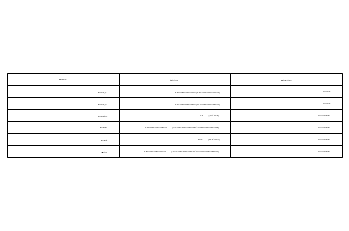

In [53]:
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(table)):
    cell_text.append(table.iloc[row])

ax.table(cellText=cell_text, colLabels=table.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()